HATE SPEECH DETECTION IN SNAPCHAT::

we are going to develope a hate speech detection model using machine learning.


We have selected a dataset the info of dataset is available in Readme section of github repo.

-- Now we are going to see all steps

--- Data Cleaning and Analysis:

Data cleaning involves preparing and cleaning the raw data to make it suitable for analysis. This includes handling missing values, removing special characters, converting text to lowercase, and more.

--Data analysis helps us to  understand the characteristics of our data, identify patterns, and detect any issues that need to be addressed.

-- Data Preprocessing:

--Tokenization and count Vectorization:
--Label Encoding:

Data preprocessing includes steps like tokenization (splitting text into words), label encoding (converting categorical labels into numeric values), and count vectorization (converting text into a matrix of token counts).



---LABEL Encoding:

Encode the 'Platform' Column using Label Encoding

Label Encoding transforms categorical values into integers. This is particularly useful for machine learning algorithms that cannot work with categorical data directly.



--Encode the 'Comment' Column using Count Vectorization.

Count Vectorization converts the text into a matrix of token counts. Each word in the text is represented as a feature.

--Combine Encoded Features.

We merge the encoded Platform column and the count vectorized Comment data into a single DataFrame.

---Splitting the Data: Splitting the dataset involves dividing the data into training and testing sets to evaluate the model's performance.

-- Handling DATA Imbalance with SMOTE


SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by generating synthetic samples for the minority class.

 -----Model Selection with Logistic Regression:


 Logistic regression is chosen for its simplicity and effectiveness for binary classification tasks.

---Evaluation:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TO

Logistic Regression Accuracy: 0.8958333333333334
Best Parameters: {'C': 10}
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       481
           1       0.88      0.91      0.90       479

    accuracy                           0.90       960
   macro avg       0.90      0.90      0.90       960
weighted avg       0.90      0.90      0.90       960



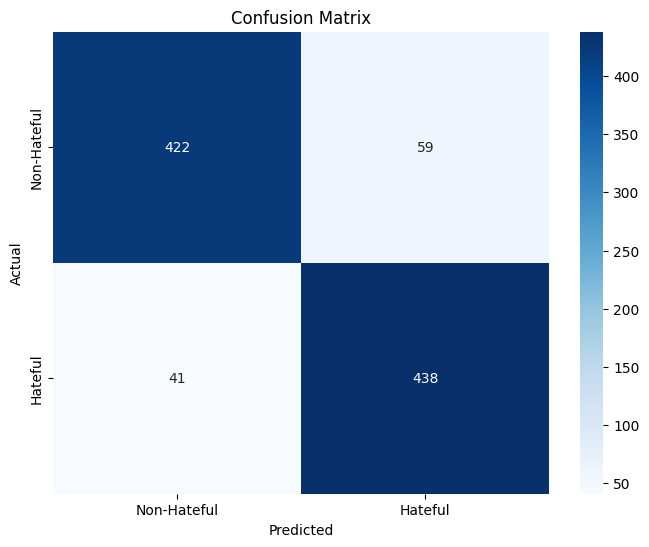

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('/content/HateSpeechDetection (Balanced dataset).csv')

# Data Cleaning
df['Comment'] = df['Comment'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()

# Data Preprocessing
df['tokenized_text'] = df['Comment'].apply(word_tokenize)

# Label Encoding
label_encoder = LabelEncoder()
df['Platform_encoded'] = label_encoder.fit_transform(df['Platform'])

# Count Vectorization
count_vectorizer = CountVectorizer(max_features=5000)
comments_count = count_vectorizer.fit_transform(df['Comment']).toarray()
comments_count_df = pd.DataFrame(comments_count, columns=count_vectorizer.get_feature_names_out())

# Combine all features into a single DataFrame
encoded_data = pd.concat([comments_count_df, df['Platform_encoded']], axis=1)
encoded_data['Hateful'] = df['Hateful']

# Handling Data Imbalance with SMOTE
X = encoded_data.drop(columns=['Hateful'])
y = encoded_data['Hateful']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Model Selection with Logistic Regression
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda row: ' '.join(row.index[row > 0]), axis=1))
X_test_vec = vectorizer.transform(X_test.apply(lambda row: ' '.join(row.index[row > 0]), axis=1))

lr_model = LogisticRegression(max_iter=200)
lr_params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_vec, y_train)

# Make predictions
lr_predictions = lr_grid.predict(X_test_vec)

# Evaluate the Model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print('Logistic Regression Accuracy:', lr_accuracy)
print('Best Parameters:', lr_grid.best_params_)
print(classification_report(y_test, lr_predictions))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hateful', 'Hateful'], yticklabels=['Non-Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
